<a href="https://colab.research.google.com/github/shrideep-tamboli/Entity-Relationship-diagram/blob/main/SampleStore_Exploratory_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Loading Dataset

In [ ]:
###LOADING DATA
import pandas as pd
SAMPLE_STORE_DATASET = '/content/drive/MyDrive/Dataset(s)/SampleSuperstore.csv'
ds=pd.read_csv(SAMPLE_STORE_DATASET)

In [ ]:
ds

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


##Different columns in the dataset

In [ ]:
for i in ds.keys():
  print(i)

Ship Mode
Segment
Country
City
State
Postal Code
Region
Category
Sub-Category
Sales
Quantity
Discount
Profit


##Data-type stored in each column

In [ ]:
print(ds.dtypes)

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


###**Modifying the DataSet**

In [ ]:
mds = ds.drop(["Postal Code","Country"],axis=1)
mds

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
ds.shape #original dataset

(9994, 13)

In [ ]:
#modified dataset
mds.shape #2 columns removed

(9994, 11)

In [ ]:
mds.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [ ]:
#We've to group sales for every state or different features to analyse sales

##number and name of unique of states

In [ ]:
len(pd.unique(mds['State']))# no. of states

49

In [ ]:
us=mds['State'].unique()
us.sort()
print(us)

['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'District of Columbia' 'Florida' 'Georgia' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


#TOTAL SALES OF 49 STATES

## STATE-SALES TABLE

In [ ]:
#summing the sales value of each state
sales_dict={}
for i in us: #for every 'i' in sorted state list,
  value=(mds.loc[mds['State'] == i, 'Sales'].sum()) #iterate{df.loc[(state name from original dataset)=='i' and if it is->sum the values of that row from sales column and store the value]
  sales_dict[i]=value
xx=list(sales_dict.keys())
yy=list(sales_dict.values())
sales_df=pd.DataFrame.from_dict(sales_dict,orient='index')
sales_df.reset_index(inplace=True)
sst=sales_df.rename(columns={'index':'State',0:'Sales'})
sst.head()


,State,Sales
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457687.6315
4,Colorado,32108.1180


### FIVE NUMBER SUMMARY OF SALES

In [ ]:
import numpy as np
#5 number summary of Sales for 49 states i.e. value of dictionary (yy)
print("Minimum Sales: ",np.min(yy))
print("Average Sales: ",np.mean(yy))
print("Median Sales: ",np.median(yy))
print("Maximum Sales: ",np.max(yy))
print("Standard Deviation: ",np.std(yy))


Minimum Sales:  919.91
Average Sales:  46881.650210204076
Median Sales:  22205.149999999998
Maximum Sales:  457687.6315
Standard Deviation:  79947.79781722173


###SALES_PERCENTILE

In [ ]:
print('minimum sales value / lower limit of the sales range(Q1) : ',np.quantile(yy,0))
print('first 25% sales upper limit                         (Q2) : ',np.quantile(yy,0.25))
print('first 50% sales upper limit / Median                (Q3) : ',np.quantile(yy,0.50))
print('first 75% sales upper limit                         (Q4) : ',np.quantile(yy,0.75))
print('maximum sales value/upper limit of the sales range  (Q5) : ',np.quantile(yy,1.0))

minimum sales value / lower limit of the sales range(Q1) :  919.91
first 25% sales upper limit                         (Q2) :  7464.93
first 50% sales upper limit / Median                (Q3) :  22205.149999999998
first 75% sales upper limit                         (Q4) :  49095.84
maximum sales value/upper limit of the sales range  (Q5) :  457687.6315


###INTER-QUARTILE RANGE and determining minimum sales quota

In [ ]:
from scipy import stats
IQR1=stats.iqr(yy) #INTER-QUARTILE RANGE b/w Q3-Q1 i.e;value of range where 50% of the data lies
#setting an minimum quota by calculating the half of the range of 50% sales and adding it to the 25th percentile
min_quota = np.quantile(yy,0.25)+IQR1/2
min_quota

28280.385

#**State Vs Sales Bar Plot**

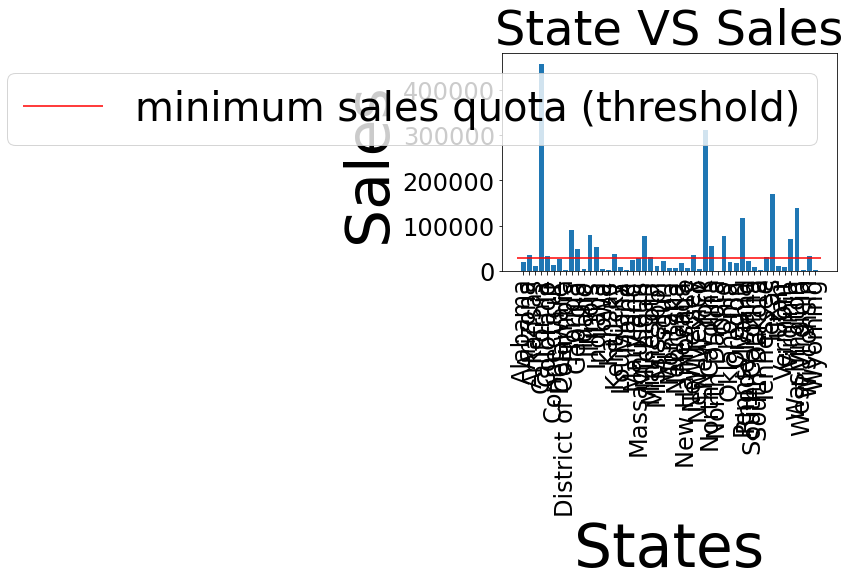

In [ ]:
import matplotlib.pyplot as plt
xx=sales_dict.keys()
yy=sales_dict.values()
svs=plt.bar(xx,yy)
plt.xticks(fontsize=24,rotation=90)
plt.yticks(fontsize=24)
plt.xlabel('States',fontsize=60)
plt.ylabel('Sales',fontsize=60)
plt.title('State VS Sales',fontsize=48)
plt.rcParams["figure.figsize"] = (50,20)
plt.hlines(min_quota,-1,49,color='red') #adding a line as the minimum quota
plt.legend(['minimum sales quota (threshold)'], prop={'size':40})
#for index,value in enumerate(yy):
#  plt.text(value,index,str(value))
plt.show()

###States not meeting the minimum sales requirement

In [ ]:
#states below the red line don't meet up the minimum quota requirement, so those states can be further dig upon to analyse the cause:
low_sales = {'State':[],'Sales':[]}
for k,v in sales_dict.items():
  if v<min_quota:
    low_sales['State'].append(k)
    low_sales['Sales'].append(v)
low_sales_df=pd.DataFrame.from_dict(low_sales).head()

In [ ]:
mds.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


##Analysing relation co-relation between different columns

In [ ]:
mds.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


*we can see there is a significant correlation b/w sales and profit therefore by working on those areas which have low sales, we can increase the profit of those region
is there any state which have sales more than minimum_quota but is in loss
first we find out states with negative profit*

#Total Profit of 49 States

##STATE - PROFIT TABLE

In [ ]:
#calculating profit made by each state
profit_dict={}
for i in us:
  profit=(mds.loc[mds['State']==i,'Profit'].sum())
  profit_dict[i]=profit
profit_df=pd.DataFrame.from_dict(profit_dict,orient='index')
profit_df.reset_index(inplace=True)
spt=profit_df.rename(columns={'index':'State',0:'Profit'})
spt.head()

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76381.3871
4,Colorado,-6527.8579


##States under loss

In [ ]:
#selecting states with negative profits/LOSS
"""low_sales = {'State':[],'Sales':[]}
for k,v in sales_dict.items():
  if v<min_quota:
    low_sales['State'].append(k)
    low_sales['Sales'].append(v)
pd.DataFrame.from_dict(low_sales).head()"""
################################################################################
loss_dict={'State':[],'Loss':[]}
for k,v in profit_dict.items():
  if v<0:
    loss_dict['State'].append(k)
    loss_dict['Loss'].append(v)
loss_df=pd.DataFrame.from_dict(loss_dict)
loss_df

,State,Loss
0,Arizona,-3427.9246
1,Colorado,-6527.8579
2,Florida,-3399.3017
3,Illinois,-12607.8870
4,North Carolina,-7490.9122
5,Ohio,-16971.3766
6,Oregon,-1190.4705
7,Pennsylvania,-15559.9603
8,Tennessee,-5341.6936
9,Texas,-25729.3563


##State with sales more than minimium quota

In [ ]:
#states with sales more than minimum quota
high_sales = {'State':[],'Sales':[]}
for k,v in sales_dict.items():
  if v>min_quota:
    high_sales['State'].append(k)
    high_sales['Sales'].append(v)
high_sales_df=pd.DataFrame.from_dict(high_sales)
high_sales_df.head()

,State,Sales
0,Arizona,35282.0010
1,California,457687.6315
2,Colorado,32108.1180
3,Florida,89473.7080
4,Georgia,49095.8400


##Merging total sales and total profit dataframes i.e. sst and spt

In [ ]:
sst.head()

,State,Sales
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457687.6315
4,Colorado,32108.1180


In [ ]:
spt.head()

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76381.3871
4,Colorado,-6527.8579


#SALES & PROFIT TABLE

In [ ]:
#sales and profit   (sap)
sap=pd.merge(sst,spt,on='State') #mergining the dataframes on common column
sap.head()

,State,Sales,Profit
0,Alabama,19510.6400,5786.8253
1,Arizona,35282.0010,-3427.9246
2,Arkansas,11678.1300,4008.6871
3,California,457687.6315,76381.3871
4,Colorado,32108.1180,-6527.8579


##sales and profit with condition
###sales>minimum quta & loss

In [ ]:
#selecting states where sales>=minimum quota BUT profit<0
ss=sap.loc[(sap['Sales']>min_quota) & (sap['Profit']<0)]
ssp=pd.DataFrame(ss)
ssp.reset_index()

,index,State,Sales,Profit
0,1,Arizona,35282.0010,-3427.9246
1,4,Colorado,32108.1180,-6527.8579
2,8,Florida,89473.7080,-3399.3017
3,11,Illinois,80166.1010,-12607.8870
4,31,North Carolina,55603.1640,-7490.9122
5,33,Ohio,78258.1360,-16971.3766
6,36,Pennsylvania,116511.9140,-15559.9603
7,40,Tennessee,30661.8730,-5341.6936
8,41,Texas,170188.0458,-25729.3563


##State-Sales Vs Profit/Loss(Bar-Plot)

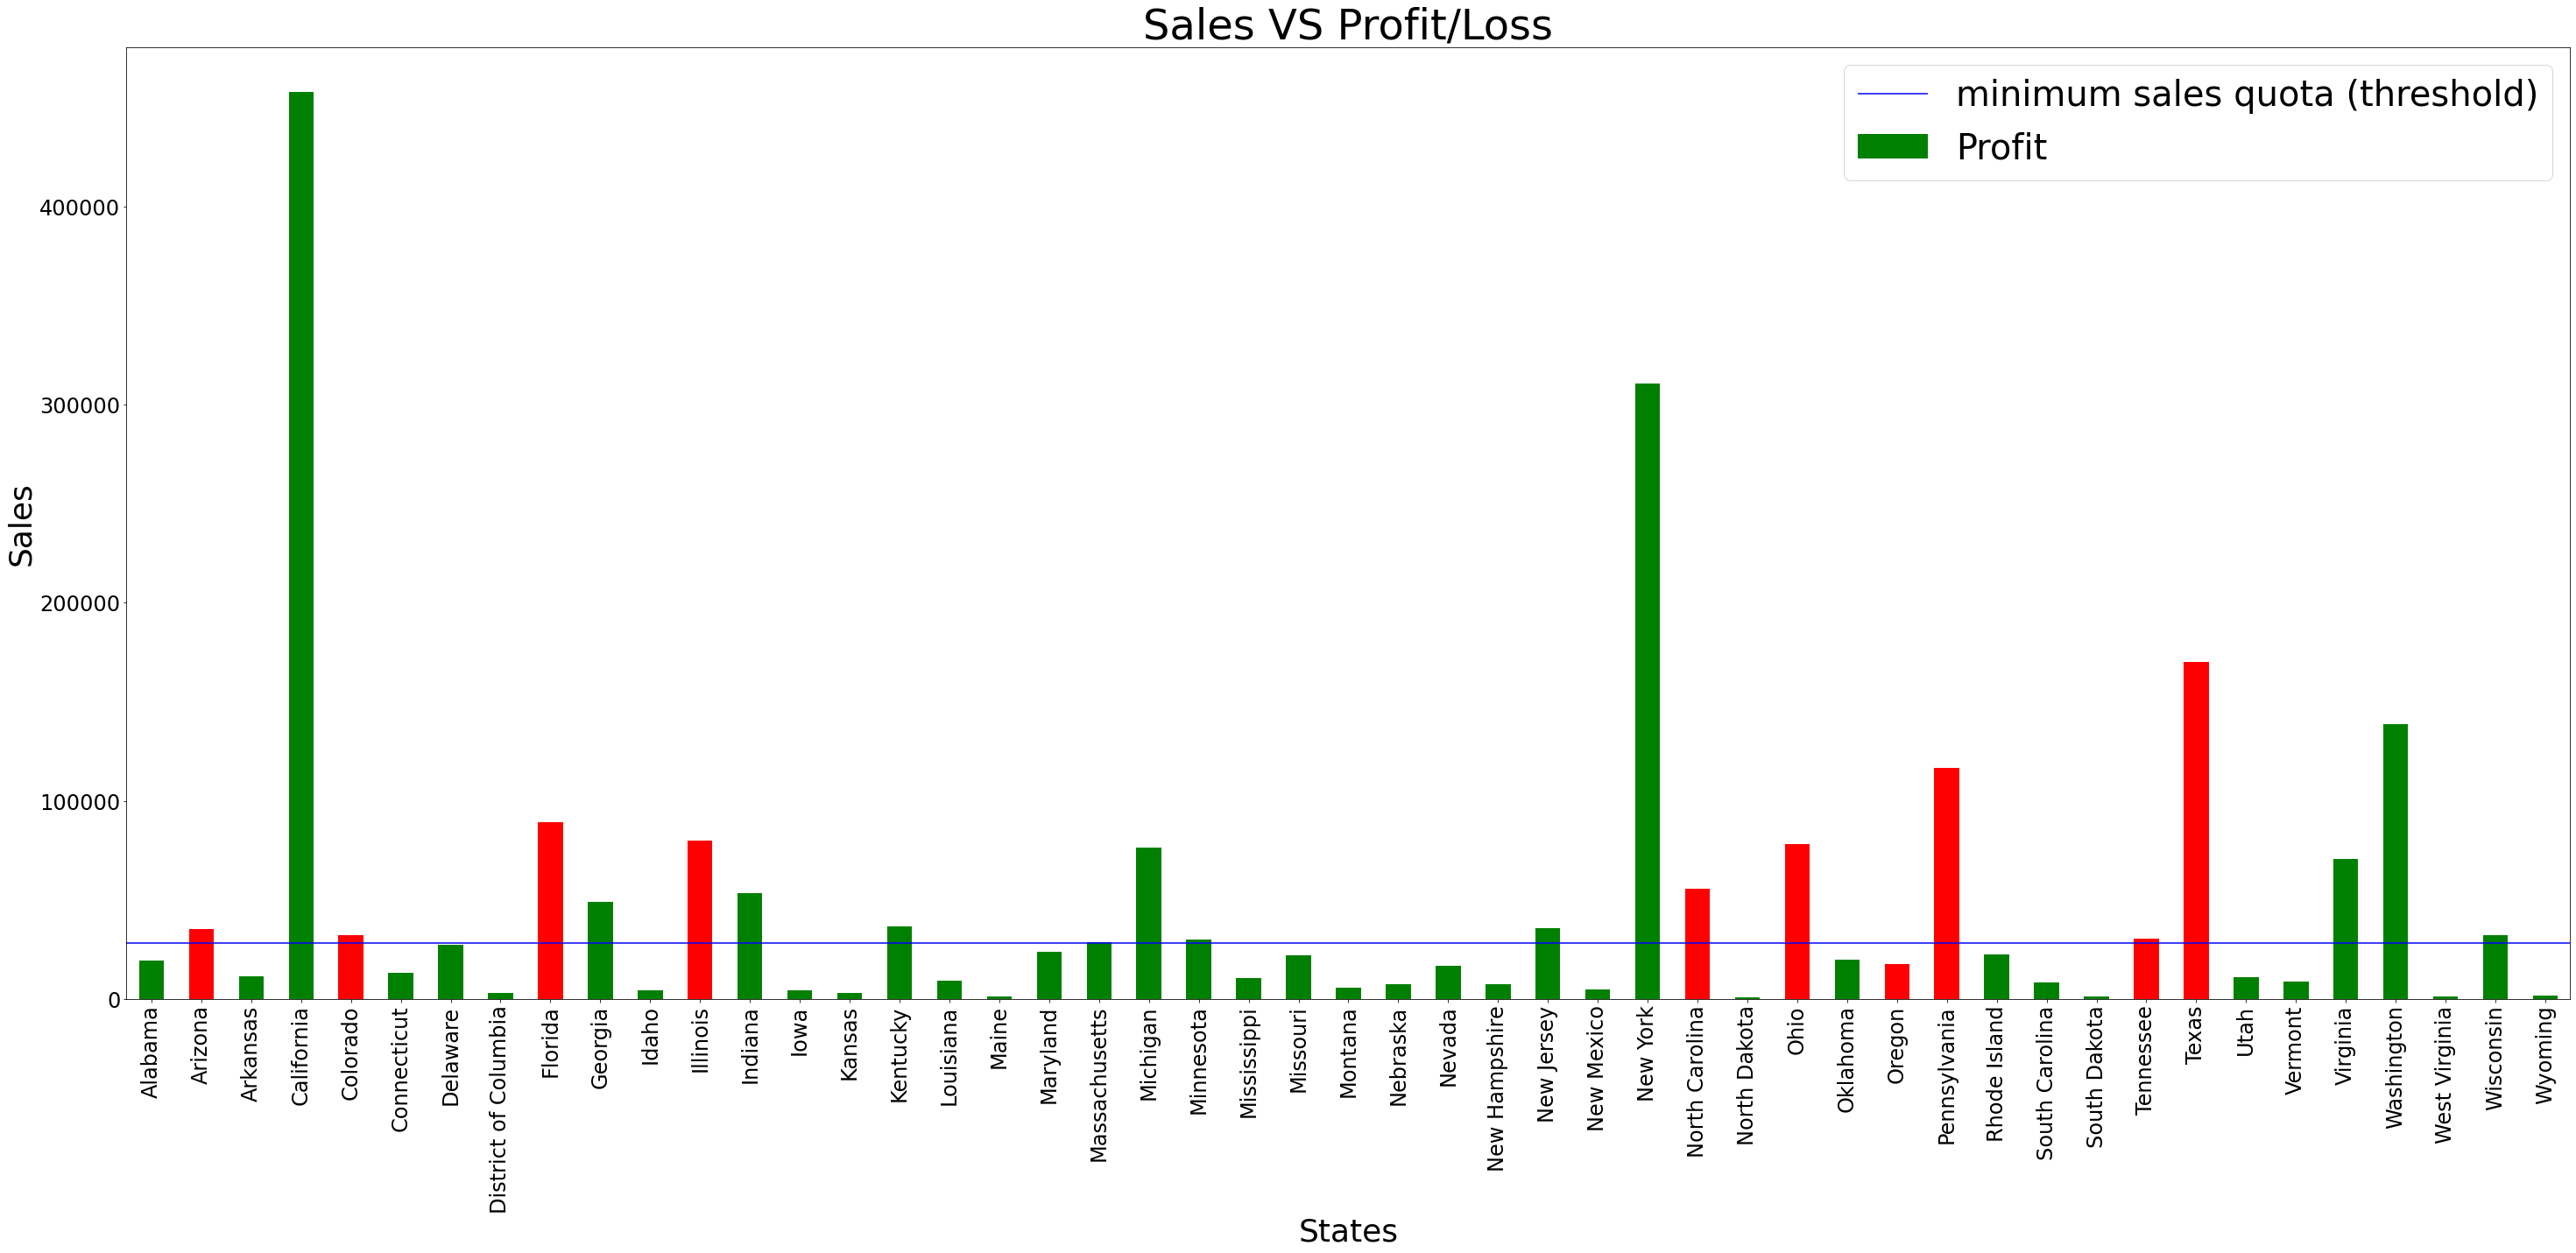

In [ ]:
#lets visulaize the above table in a barplot
#for states with loss, plot a red bar
#plot a minimum quota bar as done earlier
import matplotlib.pyplot as plt
clrs = ["green" if i>0 else "red" for i in sap['Profit']] 
sap.plot(x='State',y='Sales',color=clrs,label='Loss',kind='bar')
plt.xticks(fontsize=24,rotation=90)
plt.yticks(fontsize=24)
plt.xlabel('States',fontsize=36)
plt.ylabel('Sales',fontsize=36)
plt.title('Sales VS Profit/Loss',fontsize=48)
plt.rcParams["figure.figsize"] = (50,20)
plt.hlines(min_quota,-1,49,color='blue') #adding a line as the minimum quota
plt.legend(['minimum sales quota (threshold)','Profit'], prop={'size':40})
plt.show()

### ***Plot analysis:*** *The above plot visualizes states with profit/loss and meeting minimum sales quota*


> The green bars indicate States with profit whereas the red bards indicate States with loss. Furthermore, bars(red and green) below the blue line indicates States not meeting minimum sales quota.
Red bars above blue line have enough sales, their profit can be increased by lesser discounts(assumption), whereas green bars below blue line are making profit but they still need to increase the sales WHEREAS red bars under the blue line need to make more profit and increase the sales together which can be acheived just by increasing the sales/increasing the profit by decreasing the discount or both.






In [ ]:
mds.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


###***Correlation analysis*** *between profit and discount results in a negative correlation, proving the previous conclusion i.e; in order to have increased profits we've to offer lesser discounts.*

In [ ]:
mds.head(20)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


##Categorical sales analysis

###unique categories

In [ ]:
categories=mds['Category'].unique()
categories.sort()
categories

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

###Total sales of each category

In [ ]:
furniture_sales=(mds.loc[mds['Category']=='Furniture','Sales'].sum())           #Total furniture sales
OfficeSupplies_sales=(mds.loc[mds['Category']=='Office Supplies','Sales'].sum())#Total Office Supplies sales
Technology_sales=(mds.loc[mds['Category']=='Technology','Sales'].sum())         #Total Technology sales
print('furniture_sales: ',furniture_sales)
print('OfficeSupplies_sales: ',OfficeSupplies_sales)
print('Technology_sales: ',Technology_sales)
print("Sum of categorical sales: ",furniture_sales+OfficeSupplies_sales+Technology_sales )
print('Total Sales (from sales column): ',sum(mds['Sales']))

furniture_sales:  741999.7953
OfficeSupplies_sales:  719047.032
Technology_sales:  836154.033
Sum of categorical sales:  2297200.8603
Total Sales (from sales column):  2297200.860299955


###Creating a pire-chart for categorical sales

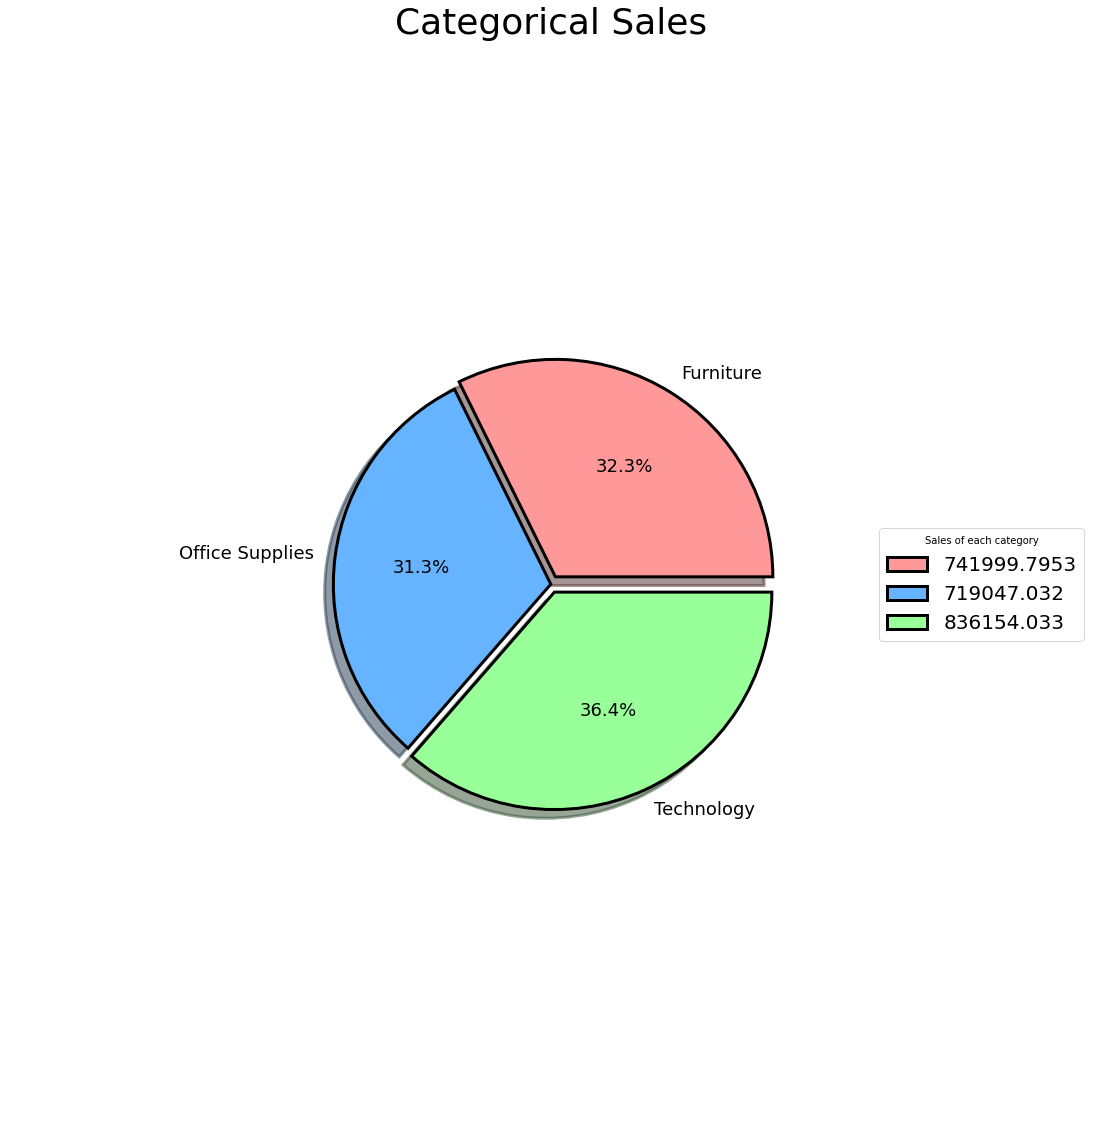

<Figure size 720x720 with 0 Axes>

In [ ]:
categorical_sales=[furniture_sales,OfficeSupplies_sales,Technology_sales]
plt.pie(categorical_sales,labels=('Furniture','Office Supplies','Technology'),shadow=True,radius=0.5,
        explode=(0.02,0,0.02),colors=('#ff9999','#66b3ff','#99ff99'),textprops={'fontsize': 18},
        wedgeprops= {"edgecolor":"black",'linewidth': 3,'antialiased': True},
        autopct='%1.1f%%')
plt.legend(categorical_sales, prop={'size':20},loc='center right',title='Sales of each category')
plt.title('Categorical Sales',fontsize='36',loc='center')
fig=plt.figure(figsize=(10,10))
fig.subplots_adjust(wspace=0)
plt.show()

* **pie chart analysis:** *we can set the minimum quota of each category as (percentage covered by each pie)min_quota*

###Exploring sales by category for states


> Analysing categorical sales and establishing weak categories per state



###{State : [ {Category1 : Sales.sum},
###           {Category2 : Sales.sum},
###           {Category3 : Sales.sum}]

In [ ]:
csd=dict()
for i in us:
  temp={}
  for j in categories:    
    v=(mds.loc[(mds['Category']==j) & (mds['State']==i),'Sales'].sum())
    temp[j]=v
  csd[i]=temp
csd

##Converting categorical sales dictionary to dataframe and then table


In [ ]:
cs_df=pd.DataFrame.from_dict(csd)
cst=np.transpose(cs_df)
#cs_df.head()
cst.reset_index(inplace=True)
cs=cst.rename(columns={'index':'State'})
cs.head()

,State,Furniture,Office Supplies,Technology
0,Alabama,6332.4800,4209.080,8969.080
1,Arizona,13525.2910,10005.825,11750.885
2,Arkansas,3187.5500,4565.330,3925.250
3,California,156064.6015,142351.948,159271.082
4,Colorado,13243.0370,7898.752,10966.329


#Minimum quota for each category
###pie chart analysis: 
we can set the minimum quota of each category as (percentage covered by each pie)*min_quota

In [ ]:
min_fs=(furniture_sales/sum(mds['Sales']))*min_quota
min_oss=(OfficeSupplies_sales/sum(mds['Sales']))*min_quota
min_ts=(Technology_sales/sum(mds['Sales']))*min_quota
print("Minimum Furniture Sales Quota       : ",min_fs)
print("Minimum Office Supplies Sales Quota : ",min_oss)
print("Minimum Technology Sales Quota      : ",min_ts)

Minimum Furniture Sales Quota       :  9134.612581620406
Minimum Office Supplies Sales Quota :  8852.04565673552
Minimum Technology Sales Quota      :  10293.726761644624


#Categorical Sales vs State Bar plot 

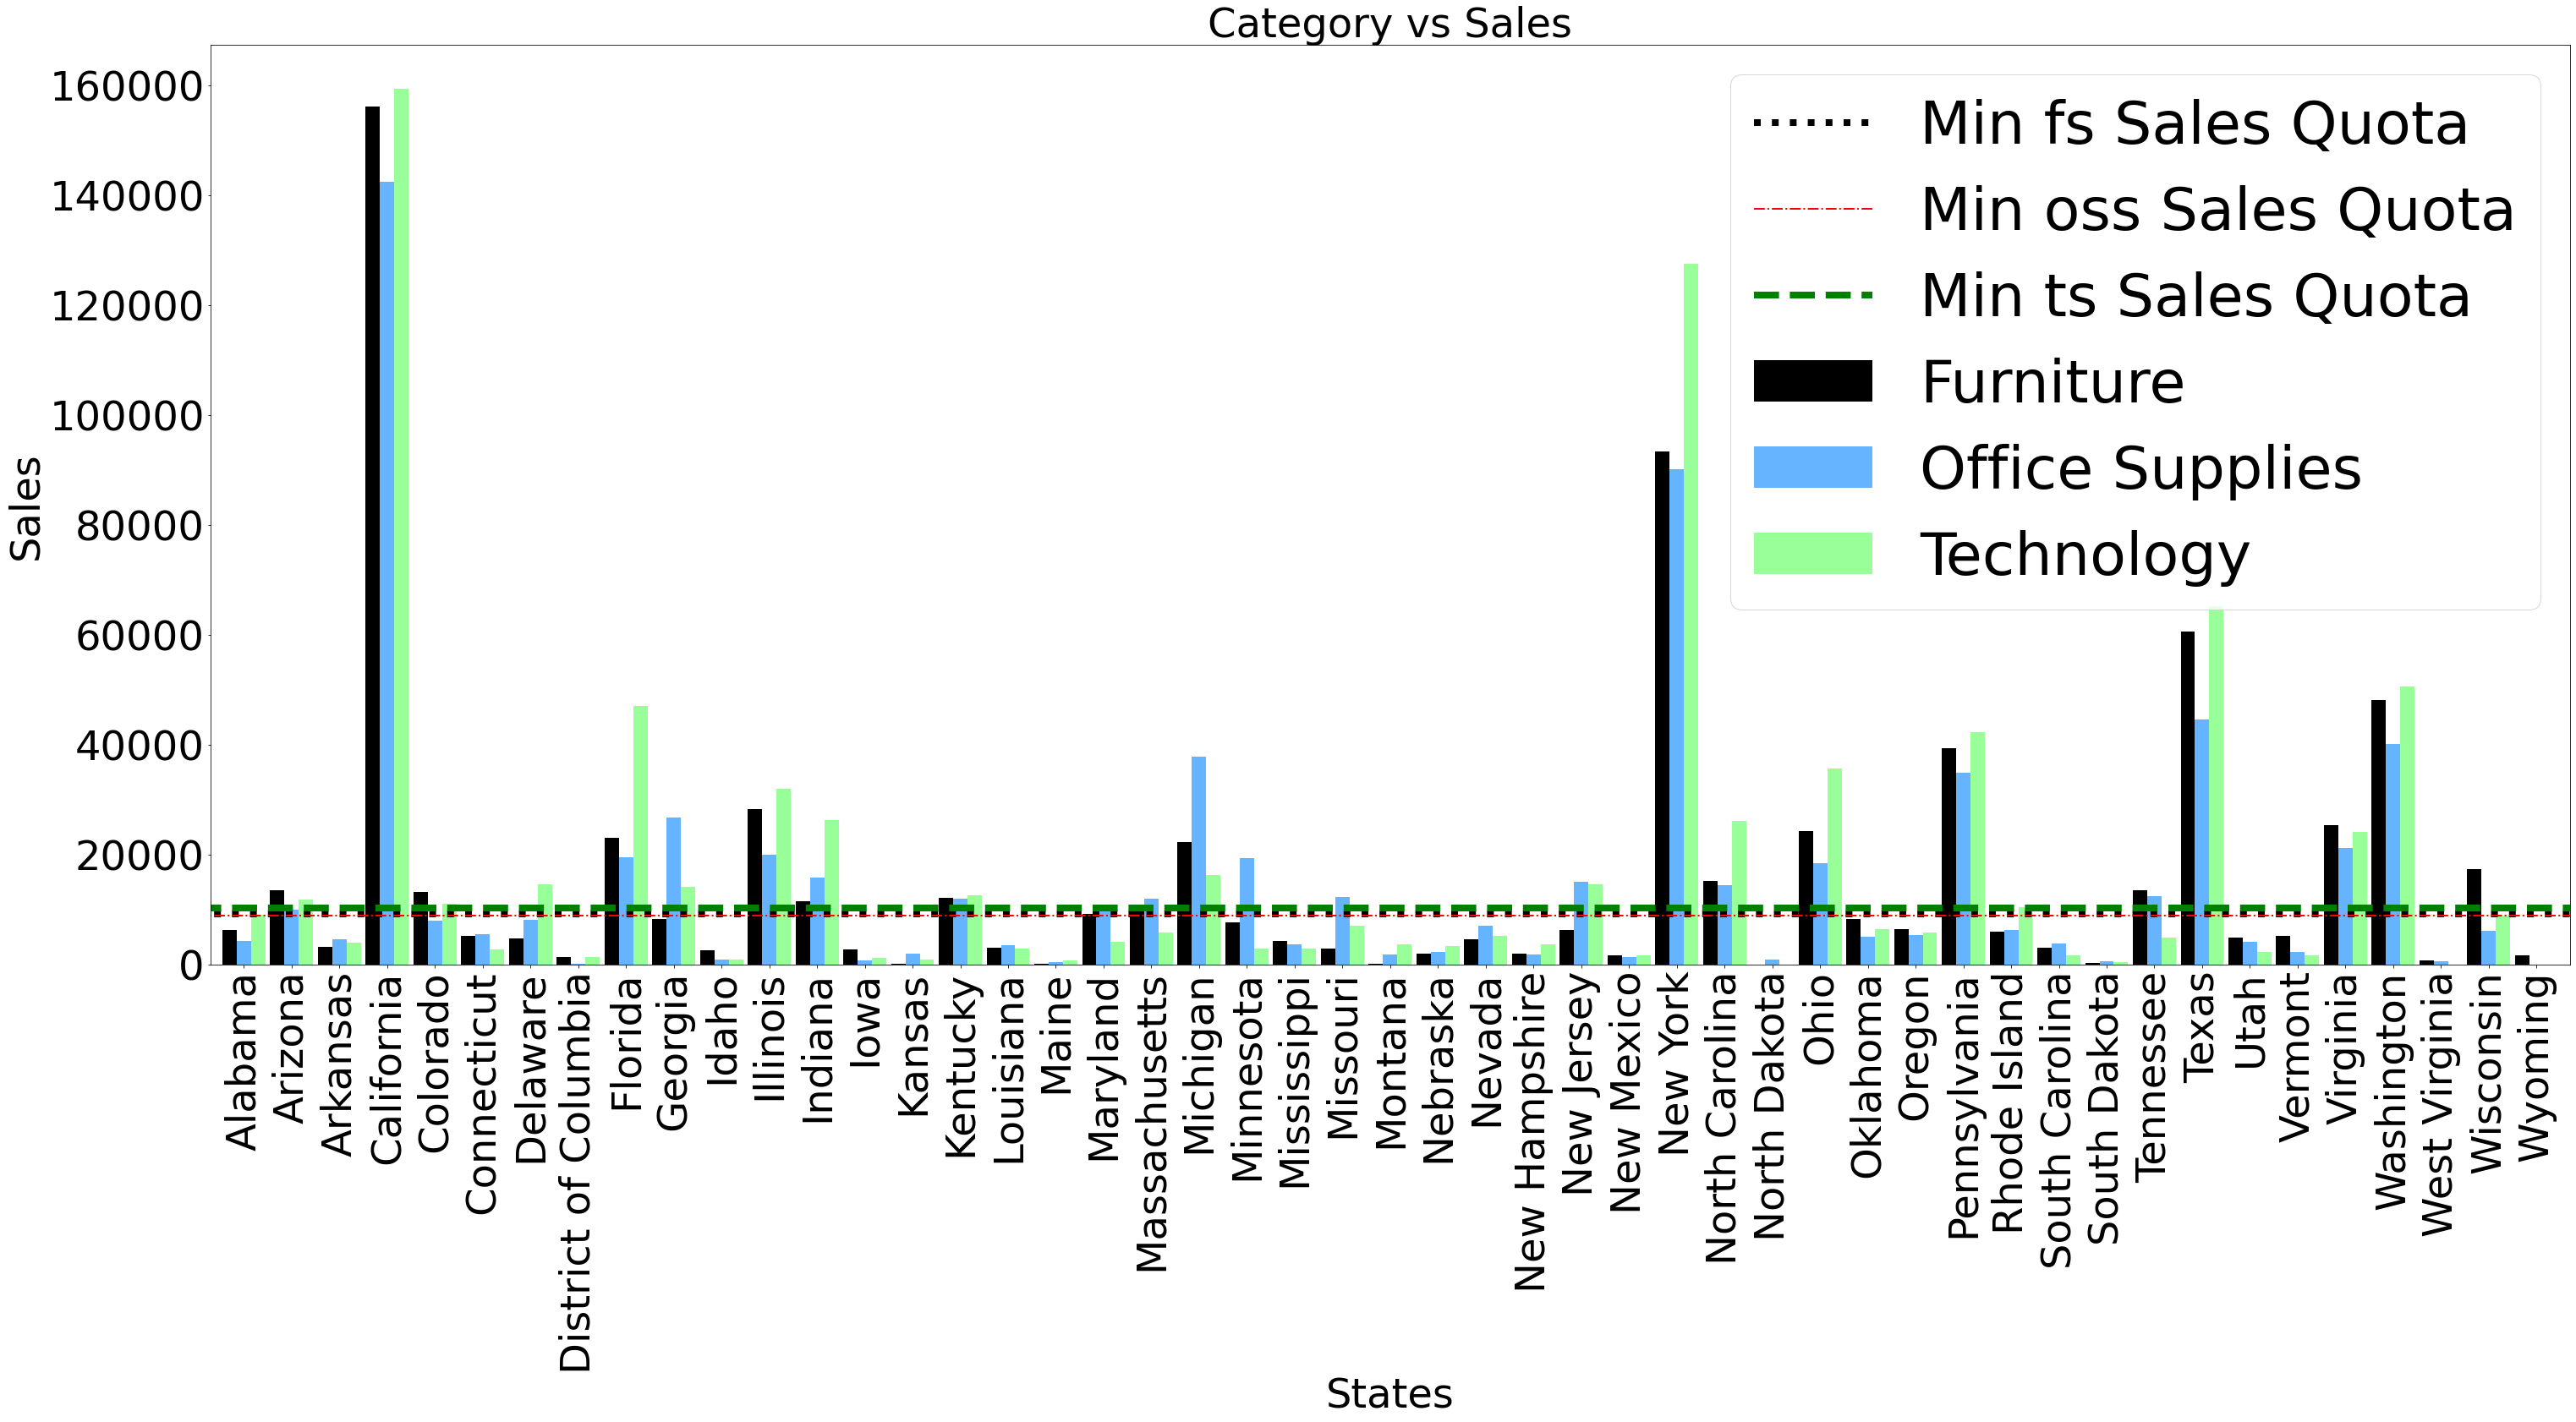

In [ ]:
def clr():
  for i in range(50):
    if ( i%2==0):
      clr = ['r','g','b']
    elif (i%2==1):
      clr = ['k','#66b3ff','#99ff99']
  return clr

cs.plot(x="State",y=['Furniture','Office Supplies','Technology'],kind='bar',width=0.9,color=clr())
plt.hlines(min_fs,-1,49,color='k',linestyle='dotted',linewidth=8) #adding a line to the third of minimum quota for categorical sales(as there are 3 categories)
plt.hlines(min_oss,-1,49,color='r',linestyle='dashdot',linewidth=2)
plt.hlines(min_ts,-1,49,color='g',linestyle='--',linewidth=8)
plt.legend(['Min fs Sales Quota','Min oss Sales Quota','Min ts Sales Quota','Furniture','Office Supplies','Technology'], prop={'size':70})
plt.xticks(rotation=90,fontsize=48)
plt.yticks(fontsize=48)
plt.xlabel('States',fontsize=48)
plt.ylabel('Sales',fontsize=48)
plt.title('Category vs Sales',fontsize=48)
plt.rcParams["figure.figsize"] = (100,50)
plt.show()

***Plot analysis***: *We can analyse the minimum qouta sales requirement by analysing the minimum qouta categorical sales requirement per state. If the state is not meeting it's minimum quota requirement we can work on increasing sales of specific categories upto minimum CS requirement where it's not meeting the minimum sales requirement.*

##Analysis from categorical sales plot and state vs profit/loss plot:
**Aim:** *To have profitable sales for each state with atleast minimum sale quota requirements met i.e; to achieve CASE 1.*

1.   *CASE: Min_quota = True & Profit = True*
2.   *CASE: Min_quota = False & Profit = True*
3.   *CASE: Min_quota = True & Profit = False*
4.   *CASE: Min_quota = False & Profit = False*


*   How to go from CASE2 -> CASE1?
    Analysing categorical sales and offering discounts where min_quota categorical sales are not met which has -ve correlation with sales WHEN categorical sales is under profit.

*   How to go from CASE3 -> CASE1?
    By reducing discounts for categorical sales under loss, therefore increasing the profit margin WHEN min_quota_CS = True

*   How to go from CASE4 -> CASE1?




##Sub-Categorical analysis
###**Unique Sub-Categories**

In [ ]:
usc=mds['Sub-Category'].unique()

##Sub_category-Sales table

In [ ]:
scd_state=[]
scd_sc=[]
sc_sales=[]
#c_sales=[]
#scd_category=[]
scd=[scd_state,scd_sc,sc_sales]
for j in us:
    for i in usc:   
      v=(mds.loc[(mds['Sub-Category']==i) & (mds['State']==j),'Sales'].sum())
      #f=(mds.loc[ (mds['Category']==z) & (mds['State']==j),'Sales'].sum())
      scd_state.append(j)
      #scd_category.append(z)
      #c_sales.append(f)
      scd_sc.append(i)
      sc_sales.append(v)
scd_df=pd.DataFrame(scd)
scs=np.transpose(scd_df)
scst=scs.rename(columns={0:'State',1:'Sub-Category',2:'Sales'})#sub-categories_sales_table(scst)
scst.head()

,State,Sub-Category,Sales
0,Alabama,Bookcases,0.0
1,Alabama,Chairs,3915.54
2,Alabama,Labels,506.49
3,Alabama,Tables,2376.46
4,Alabama,Storage,1249.41


###Data prep for sub_categorical pie chart analysis

In [ ]:
tscs=dict()#total sub-categorical sales
for i in usc:
  v=mds.loc[mds['Sub-Category']==i,'Sales'].sum()
  tscs[i]=v
tscs_df=pd.DataFrame.from_dict(tscs,orient='index')
tscs_mdf=tscs_df.reset_index()
sctst=tscs_mdf.rename(columns={'index':'Sub-Category',0:'Total sales'})
sctst
#tscs_df

,Sub-Category,Total sales
0,Bookcases,114879.9963
1,Chairs,328449.1030
2,Labels,12486.3120
3,Tables,206965.5320
4,Storage,223843.6080
5,Furnishings,91705.1640
6,Art,27118.7920
7,Phones,330007.0540
8,Binders,203412.7330
9,Appliances,107532.1610


##Pie-subplots
##Categoical vs Sub-Categorical sales pie

In [ ]:
from pandas.plotting import plot_params
#ax1=plt.figure(figsize=(20,20))
#ax2=plt.figure(figsize=(10,10))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(200,200))
ax1.pie(categorical_sales,labels=('Furniture','Office Supplies','Technology'),shadow=True,radius=0.8,
        explode=(0.02,0,0.02),colors=('#ff9999','#66b3ff','#99ff99'),textprops={'fontsize': 80},
        wedgeprops= {"edgecolor":"black",'linewidth': 3,'antialiased': True},startangle=0,
        autopct='%1.1f%%')

fig.legend([ax1,ax2],labels=['Furnitue','Office Supplies','Technology'],loc='center',prop={'size':80})
def explode():
  l=[]
  for i in range(len(sctst['Sub-Category'])):
    l.append(0.2)
  return l
fc='#ff9999'
oc='#66b3ff'
tc='#99ff99'
ax2data=[tscs['Chairs'],tscs['Tables'],tscs['Bookcases'],tscs['Furnishings'],tscs['Phones'],tscs['Machines'],tscs['Accessories'],tscs['Copiers'],tscs['Fasteners'],tscs['Storage'],tscs['Labels'],tscs['Binders'],tscs['Envelopes'],tscs['Appliances'],tscs['Art'],tscs['Paper'],tscs['Supplies']]
scc={'Chairs':fc,'Tables':fc,'Bookcases':fc,'Furnishing':fc,'Phones':tc,'Machines':tc,'Accessories':tc,'Copiers':tc,'Fasteners':oc,'Storage':oc,'Labels':oc,'Binders':oc,'Envelops':oc,'Appliances':oc,'Art':oc,'Paper':oc,'Supplies':oc}
ax2.pie(ax2data,labels=scc.keys(),shadow=True,radius=0.8,colors=scc.values(),textprops={'fontsize': 80},
        explode=explode(),pctdistance=0.90,wedgeprops= {'antialiased': True,},counterclock=False,startangle=90,
        autopct='%1.1f%%')
for ax,titles in zip((ax1,ax2),('Categorical Sales','Sub-Categorical Sales')):
  ax.set_title(titles,fontweight='bold',size=90)
#centre circle for sub-categorical pie chart
centre_circle = plt.Circle((0, 0), 0.8, fc='white')
fig = plt.gcf()  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle) #plt.legend(categorical_sales, prop={'size':20},loc='center right',title='Sales of each category')
plt.show()

<ipython-input-41-28de388606cf>:10: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([ax1,ax2],labels=['Furnitue','Office Supplies','Technology'],loc='center',prop={'size':80})


Profit/Loss by SubCategory

In [ ]:
ax3data=['Chairs','Tables','Bookcases','Furnishings','Phones','Machines','Accessories','Copiers','Fasteners','Storage','Labels','Binders','Envelopes','Appliances','Art','Paper','Supplies']
tpcs=dict()#total sub-categorical profit 
for i in ax3data: 
  v=mds.loc[mds['Sub-Category']==i,'Profit'].sum() 
  tpcs[i]=v 
tpcs_df=pd.DataFrame.from_dict(tpcs,orient='index') 
tpcs_mdf=tpcs_df.reset_index() 
sctpt=tpcs_mdf.rename(columns={'index':'Sub Category',0:'Total Profit'}) 
sctpt
#tpcs_mdf

,Sub Category,Total Profit
0,Chairs,26590.1663
1,Tables,-17725.4811
2,Bookcases,-3472.5560
3,Furnishings,13059.1436
4,Phones,44515.7306
5,Machines,3384.7569
6,Accessories,41936.6357
7,Copiers,55617.8249
8,Fasteners,949.5182
9,Storage,21278.8264


In [ ]:
numofprod=dict()
for i in ax3data:
  v=mds.loc[mds['Sub-Category']==i,'Quantity'].sum()
  numofprod[i]=v
numofprod_df=pd.DataFrame.from_dict(numofprod,orient='Index')
nop_df=numofprod_df.reset_index()
nop=nop_df.rename(columns={'index':'Sub Category',0:'Qty'})
nop

,Sub Category,Qty
0,Chairs,2356
1,Tables,1241
2,Bookcases,868
3,Furnishings,3563
4,Phones,3289
5,Machines,440
6,Accessories,2976
7,Copiers,234
8,Fasteners,914
9,Storage,3158


chart to represent:

total qty of each product sold

total profit of each product

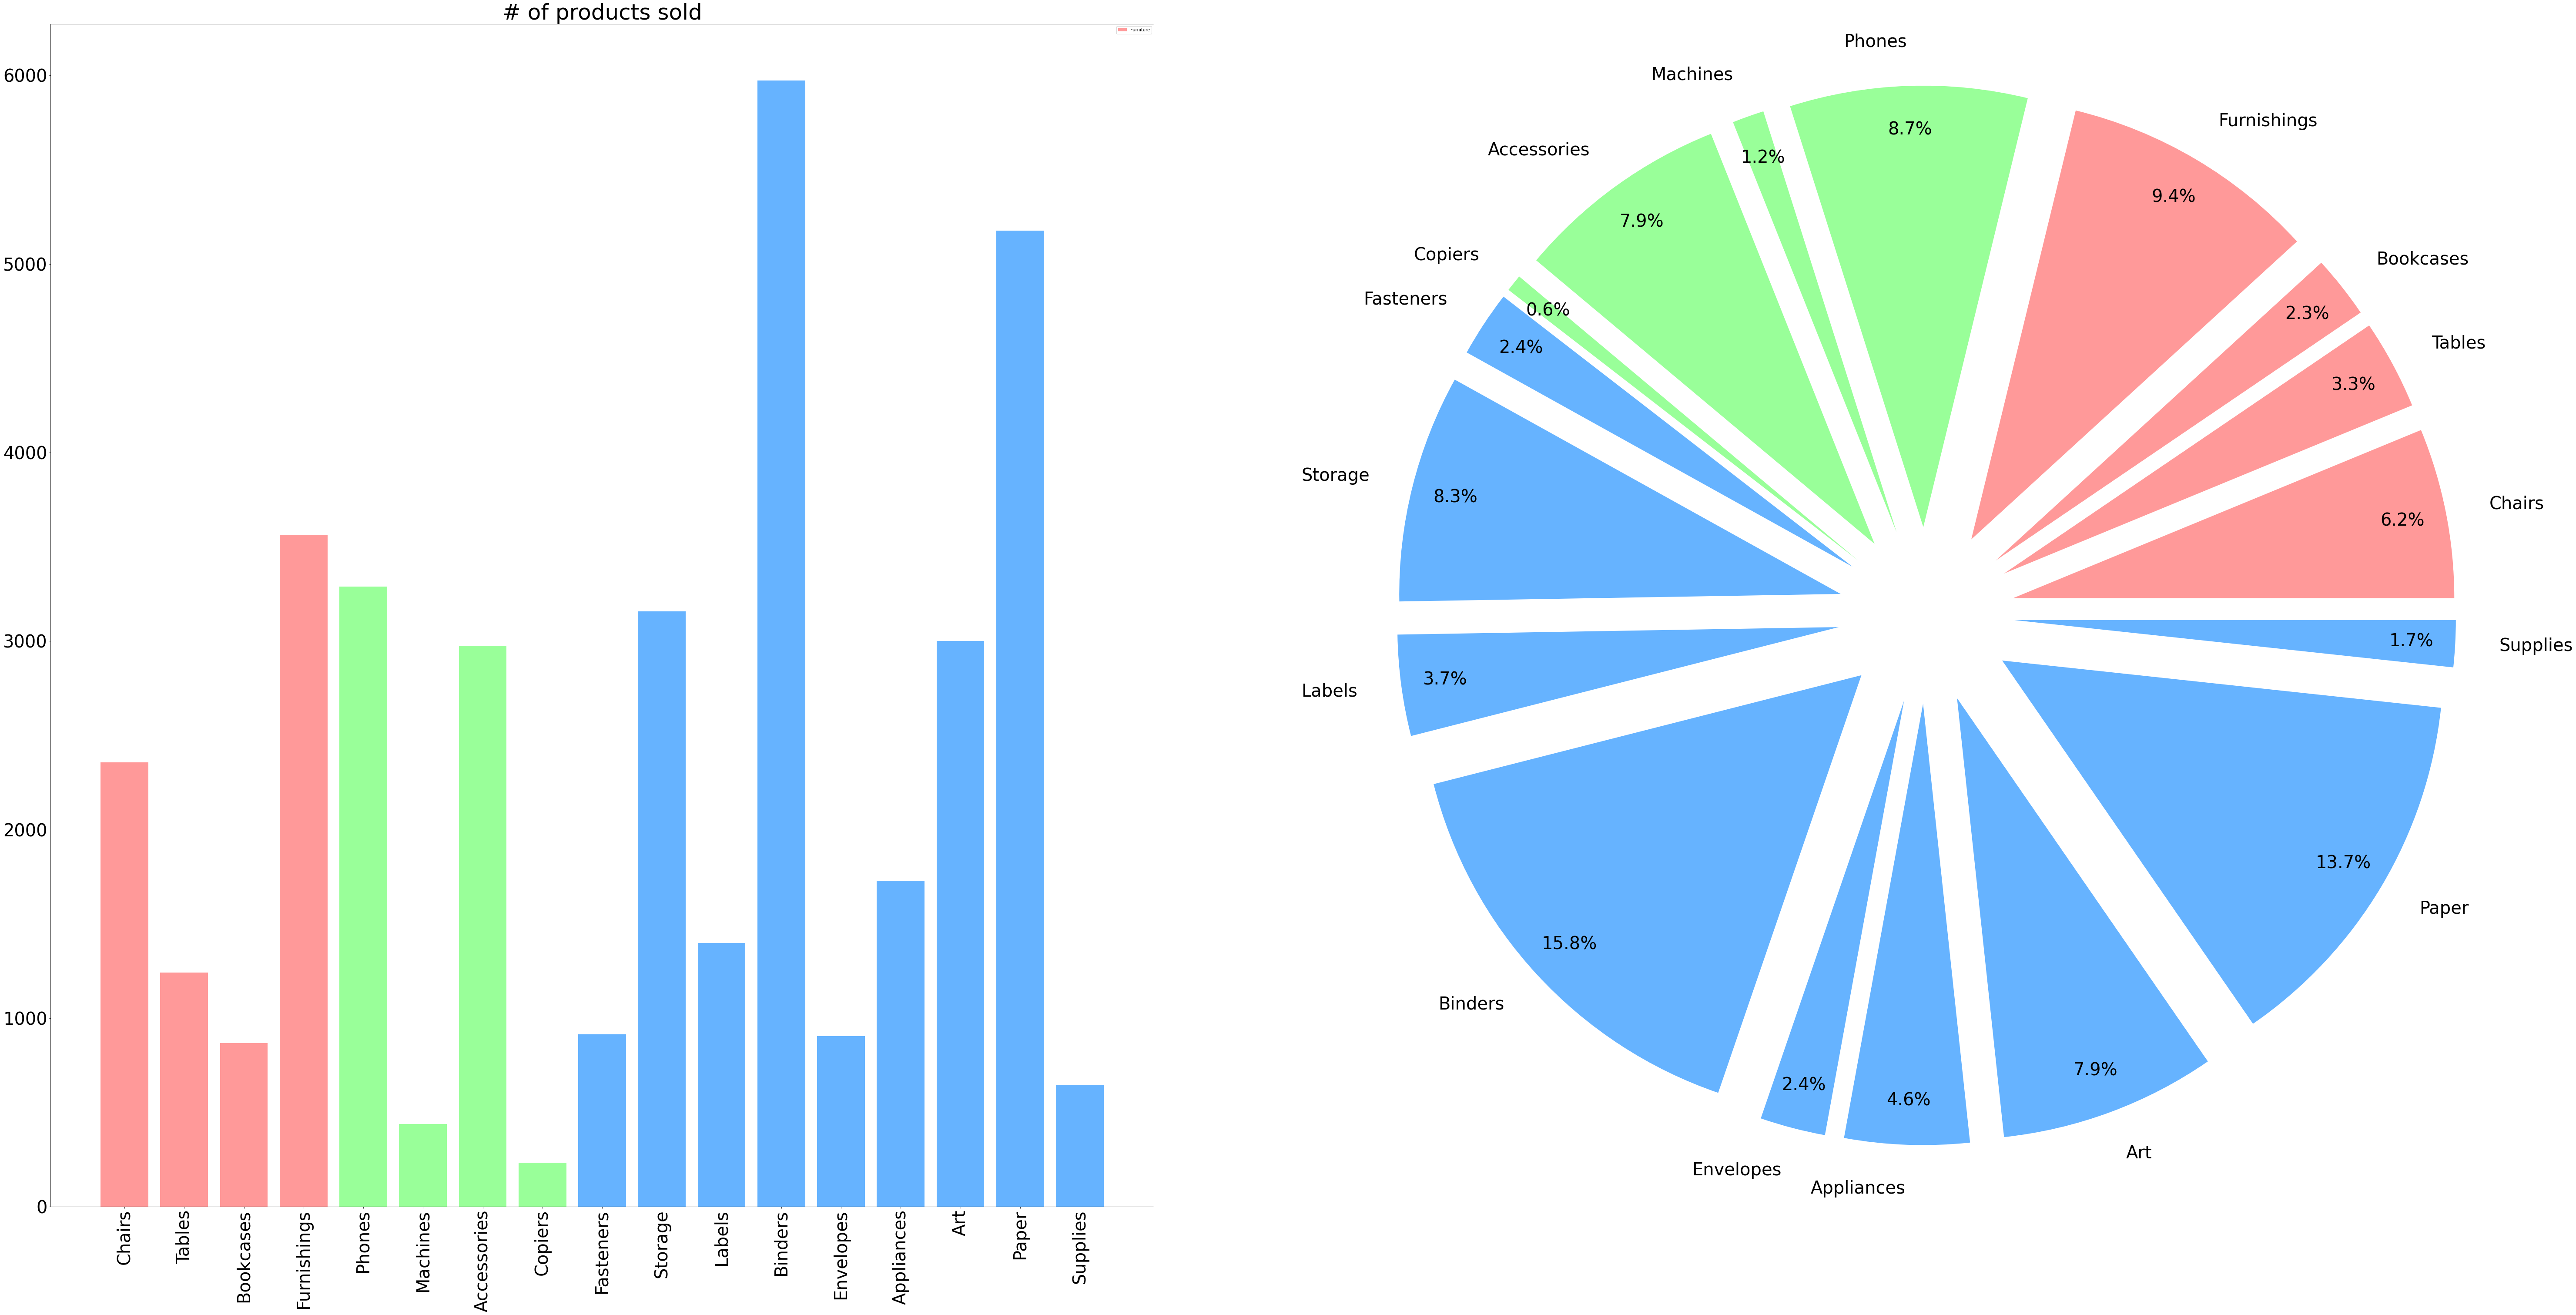

<Figure size 720x720 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.title('# of products sold',fontsize=50)
scbar=plt.bar(nop['Sub Category'],nop['Qty'],color=scc.values(),label=['Furnitue','Office Supplies','Technology'])
plt.xticks(rotation=90,fontsize=40)
plt.yticks(fontsize=40)
plt.subplot(122)
scpie=plt.pie(nop['Qty'],labels=nop['Sub Category'],colors=scc.values(),textprops={'fontsize':40},explode=explode(),autopct='%1.1f%%',pctdistance=0.90)
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
mds.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
